In [210]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [211]:
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [212]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [213]:
np.random.seed(42)

x = dataset.data[:, 5:6]
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

#### Formeln für die Lineare Regression:

$\beta = (X^TX)^{-1}X^Ty$  
$\hat{y} = X\beta$

In [214]:
class LinearRegression:
    def __init__(self, fit_intercept: bool = True):
        self.coef_: np.ndarray = None
        self.intercept_: np.ndarray = None
        self.fit_intercept: bool = fit_intercept

    def _add_intercept(self, X):
        intercepts = np.ones(X.shape[0])
        X = np.column_stack((intercepts, X))
        return X

    def fit(self, X: np.ndarray, y: np.ndarray):
        if self.fit_intercept == True:
            X = self._add_intercept(X)
        inner = np.dot(X.T, X)
        inv = np.linalg.inv(inner)
        result = np.dot(np.dot(inv, X.T), y)
        if self.fit_intercept:
            self.coef_ = result[1:]
            self.intercept_ = result[0]
        else:
            self.coef_ = result[1:]
            self.intercept_ = np.zeros(shape=(1,))

    def predict(self, X: np.ndarray):
        y_pred = np.array(
            [np.dot(self.coef_.T, x_i) + self.intercept_ for x_i in X]
        )
        return y_pred

    def score(self, X: np.ndarray, y: np.ndarray):
        y_pred = self.predict(X)
        y_mean = np.mean(y, axis=0)
        frac1 = sum(
            [(y[i] - y_pred[i])**2 for i in range(len(y))]
        )
        frac2 = sum(
            [(y[i] - y_mean)**2 for i in range(len(y))]
        )
        r2 = 1.0 - frac1 / frac2
        return r2

In [215]:
regr = LinearRegression(fit_intercept=True)
regr.fit(x_train, y_train)
r2_score = regr.score(x_test, y_test)

print(f"Coefs:\n{regr.coef_}")
print(f"Intercept: {regr.intercept_}")
print(f"R2-score: {r2_score}")

Coefs:
[9.1181022]
Intercept: -34.662307438401555
R2-score: 0.45846499343030833


In [216]:
def plot_residuals(regr, x_train, y_train, x_test, y_test):
    y_pred_train = regr.predict(x_train)
    y_pred_test = regr.predict(x_test)

    min_val = min(np.min(y_pred_train), np.min(y_pred_test))
    max_val = max(np.max(y_pred_train), np.max(y_pred_test))

    plt.scatter(y_pred_train, y_pred_train - y_train, color="blue")
    plt.scatter(y_pred_test, y_pred_test - y_test, color="red")
    plt.hlines(y=0, xmin=min_val, xmax=max_val)
    plt.legend(["Train", "Test"])
    plt.show()

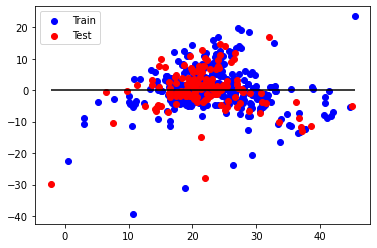

In [217]:
plot_residuals(regr, x_train, y_train, x_test, y_test)